# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


# Task 1: Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: x_norm contains trajectories and t is a time vector

In [153]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])
x.shape



(101, 501)

# Task 2: Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

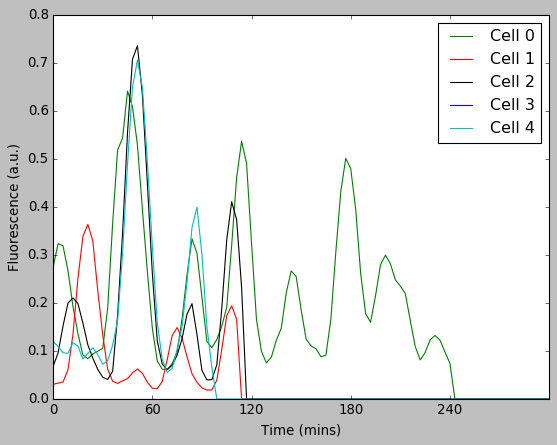

In [118]:
indices = np.random.choice(x.shape[1], 5, replace=False)

color_list = ['-r', '-k', '-b', '-c', '-g'] 
for i in range(0,5):
    type(i)
    plotter.plot(time, x[:,indices[i]], color_list[i - 1], label = "Cell {}".format(str(i)))

plotter.xticks(range(0, 300, 60))
plotter.xlabel('Time (mins)')  
plotter.ylabel('Fluorescence (a.u.)')  
plotter.legend();



# Task 3: Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

In [114]:
from scipy.signal import find_peaks

peak = []

for i in range (0,501):
    d = x[:,i]
    peaks, _ = find_peaks(d, height =0)
    peak.append(peaks)
    
peak

# Task 4: Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

In [119]:
amplitude=np.zeros(501)

for i in range (0,501):
    d = x[:,i]
    amplitude[i]=np.mean(d[peaks])
    amplitude = np.nan_to_num(amplitude) 
    
amplitude

In [120]:
period=[]

for i in range (0,501):
    difvector=[]
    for j in range(len(peak[i])-1): # Calculate periods manually.
        dif = (peak[i][j+1]-peak[i][j])
        difvector.append(dif)
    period.append(np.mean(difvector))

periodtime = np.array(period) 
periodtime = np.nan_to_num(periodtime) # Transform NAN to 0.
periodtime

# Task 5: Draw histograms of period distribution

Text(0.5, 1.0, 'HISTOGRAM OF PERIOD DISTRIBUTION')

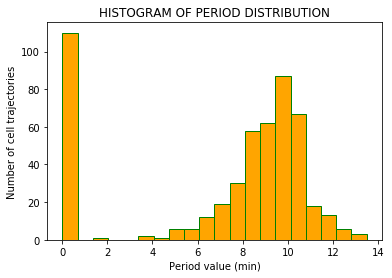

In [21]:
plotter.hist(periodtime, bins=20, alpha=1, histtype='bar', color='orange', edgecolor='g')
plotter.xlabel('Period value (min)')
plotter.ylabel('Number of cell trajectories')
plotter.title('HISTOGRAM OF PERIOD DISTRIBUTION')

# Task 6: Plot amplitude vs period with labels

Text(0.5, 1.0, 'Amplitude vs. Period')

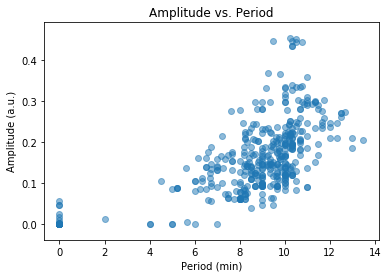

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()

plotter.scatter(periodtime, amplitude, alpha=0.5, cmap='viridis') 
plotter.xlabel("Period (min)")
plotter.ylabel("Amplitude (a.u.)")
plotter.title('Amplitude vs. Period')

# Task 7: Select ten cell trajectiories with the smallest periods and plot those as a heat map 

/home/osboxes/Anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


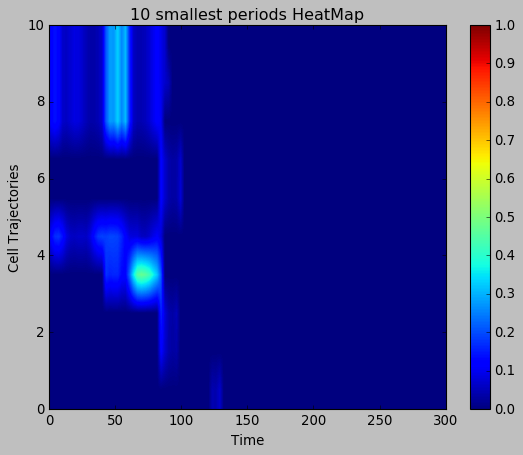

In [156]:
# Look for the 10 highest frecuencies = 10 smallest periods.

freq = 1/periodtime
freq # Some results are divided by zero, so we wil have INFINITES. We must CHANGE THEM

import pandas as pd
pd.options.mode.use_inf_as_na = True
df = pd.DataFrame(data=freq)
df.fillna(df.min(),inplace=True)

freq # Once we have changed the infinite values (with the lowest frequency value),
     # it is posible to look for the 10 maximum values of the frequence

import heapq
Highfreq = heapq.nlargest(10, freq) 
Highfreq  # Ten greatest values

#Now we have to retrieve the indexes of these 10 values:
list = heapq.nlargest(10, range(len(freq)), freq.take) 


ten_highest = np.zeros(10)
for ind in list:
    ten_highest[list.index(ind)] = freq[ind] 
# print(ten_highest)  # Array with the 10 highest frecency values = 10 lowest period values

    
#Selecting the ten cell trajectories of interest:
tentrajectories = (x[:,415],x[:,142],x[:,150],x[:,23],x[:,7],x[:,160],x[:,181],x[:,5],x[:,40],x[:,52])
# print(tentrajectories)

# Finally, the Heat Map
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(tentrajectories, extent=[0,300,0,10], aspect='auto',origin='lower', cmap="jet")
plotter.xlabel('Time')
plotter.ylabel('Cell Trajectories')
plotter.title('10 smallest periods HeatMap')
plotter.colorbar()
plotter.clim(0,1)

# Task 8: Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal

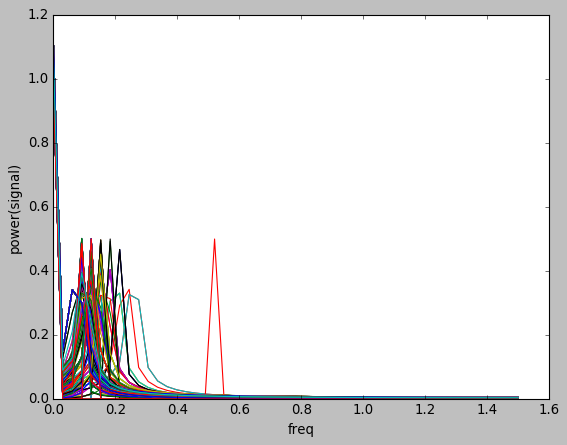

In [155]:
from scipy import fftpack

N=101
T = 1.0/3.0
x2 = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.xlabel('freq')
plotter.ylabel('power(signal)')

for i in range (0,501):
    F = freq[i]
    y = 0.5*(1+np.sin(F * 2.0*np.pi*x2))
    yf = fft(y)
    plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
